This was a quick 1-hour before the exam notebook, quickly made to be used in case of matlab not working at the exam. For more detailed, better looking solutions, check out the livescript "F24_exam.mlx"

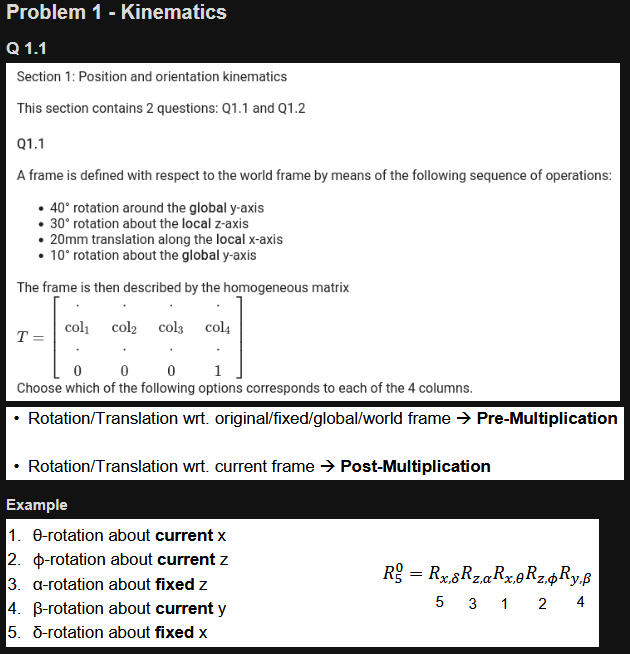

In [3]:
import numpy as np
from sympy import Matrix, N, deg

# Rotation matrices (degrees to radians conversion included)
def Rx(alpha):
    a = np.deg2rad(alpha)
    return np.array([
        [1, 0,          0,           0],
        [0, np.cos(a), -np.sin(a),  0],
        [0, np.sin(a),  np.cos(a),  0],
        [0, 0,          0,           1]
    ])

def Ry(beta):
    b = np.deg2rad(beta)
    return np.array([
        [ np.cos(b), 0, np.sin(b), 0],
        [ 0,         1, 0,         0],
        [-np.sin(b), 0, np.cos(b), 0],
        [ 0,         0, 0,         1]
    ])

def Rz(gamma):
    g = np.deg2rad(gamma)
    return np.array([
        [np.cos(g), -np.sin(g), 0, 0],
        [np.sin(g),  np.cos(g), 0, 0],
        [0,          0,         1, 0],
        [0,          0,         0, 1]
    ])

# Translation matrices (in mm)
def Tx(a):
    return np.array([
        [1, 0, 0, a],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ])

def Ty(b):
    return np.array([
        [1, 0, 0, 0],
        [0, 1, 0, b],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ])

def Tz(c):
    return np.array([
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, c],
        [0, 0, 0, 1]
    ])

# Transformation matrix
R = Ry(10) @ Ry(40) @ Rz(30) @ Tx(20)

# Extract and print rotation matrix (first 3 columns of first 3 rows)
rotation_matrix = R[:3, :3]

# Convert to symbolic matrix and round
sym_rot = Matrix(rotation_matrix)
print("Rotation matrix (rounded to 3 digits):")
print(N(sym_rot, 3))
from sympy import Matrix, N

# Assuming R is already computed from previous example:
column_4 = R[:3, 3]  # Extract the first 3 elements of column 4

# Convert to SymPy matrix for vpa-style formatting
sym_col_4 = Matrix(column_4)
print("Column 4 (position vector), rounded to 4 digits:")
print(N(sym_col_4, 4))


Rotation matrix (rounded to 3 digits):
Matrix([[0.557, -0.321, 0.766], [0.500, 0.866, 0], [-0.663, 0.383, 0.643]])
Column 4 (position vector), rounded to 4 digits:
Matrix([[11.13], [10.00], [-13.27]])


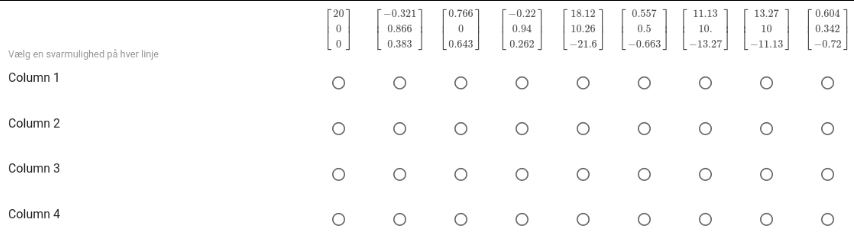


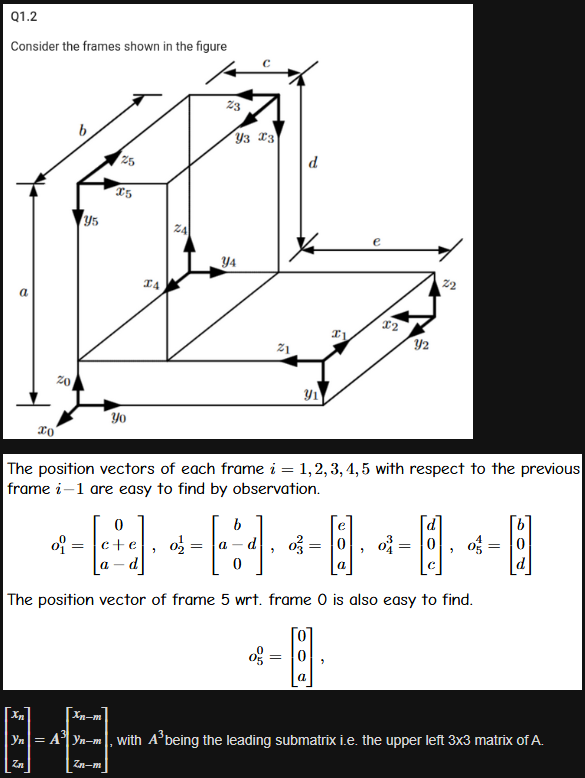

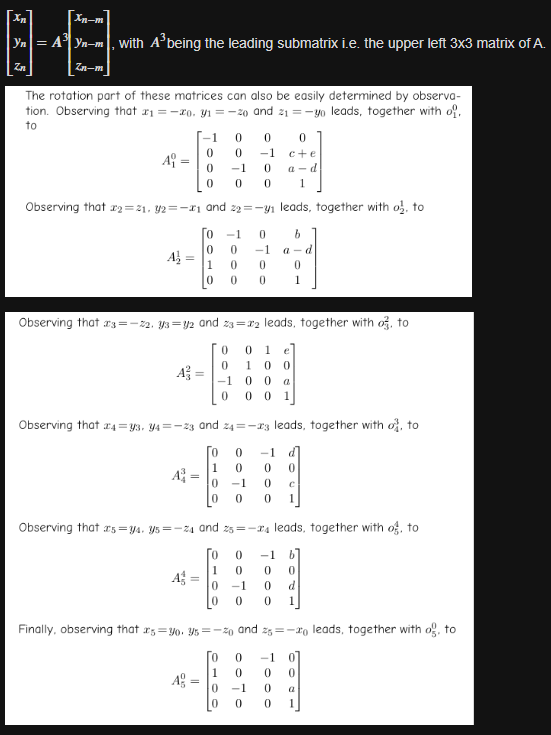

In [10]:
from sympy import symbols, Matrix, simplify, pprint

# Define symbols
a, b, c, d, e = symbols('a b c d e')

# Define transformation matrices
A01 = Matrix([
    [-1, 0, 0, 0],
    [ 0, 0, -1, c + e],
    [ 0, -1, 0, a - d],
    [ 0, 0, 0, 1]
])

A12 = Matrix([
    [0, -1, 0, b],
    [0,  0, -1, a - d],
    [1,  0, 0, 0],
    [0,  0, 0, 1]
])

A23 = Matrix([
    [0,  0, 1, e],
    [0,  1, 0, 0],
    [-1, 0, 0, a],
    [0,  0, 0, 1]
])

A34 = Matrix([
    [0,  0, -1, d],
    [1,  0,  0, 0],
    [0, -1,  0, c],
    [0,  0,  0, 1]
])

A45 = Matrix([
    [0,  0, -1, b],
    [1,  0,  0, 0],
    [0, -1,  0, d],
    [0,  0,  0, 1]
])

# Compute H25
H25 = simplify(A23 * A34 * A45)

# Print each column
print("H25 columns:")
# print columns from left to rigth
print("Column 1:")
print(H25[:, 0])
print("Column 2:")
print(H25[:, 1])
print("Column 3:")
print(H25[:, 2])
print("Column 4:")
print(H25[:, 3])


H25 columns:
Column 1:
Matrix([[-1], [0], [0], [0]])
Column 2:
Matrix([[0], [0], [-1], [0]])
Column 3:
Matrix([[0], [-1], [0], [0]])
Column 4:
Matrix([[c + e], [b], [a], [1]])


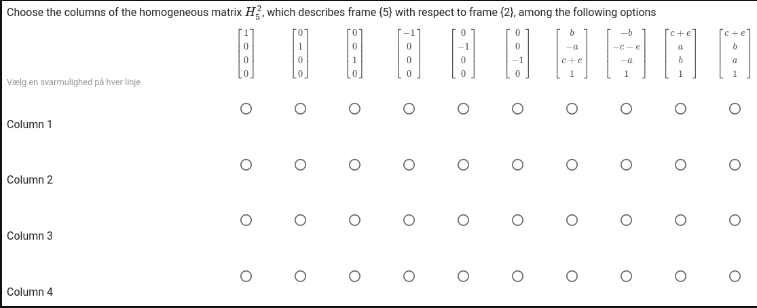

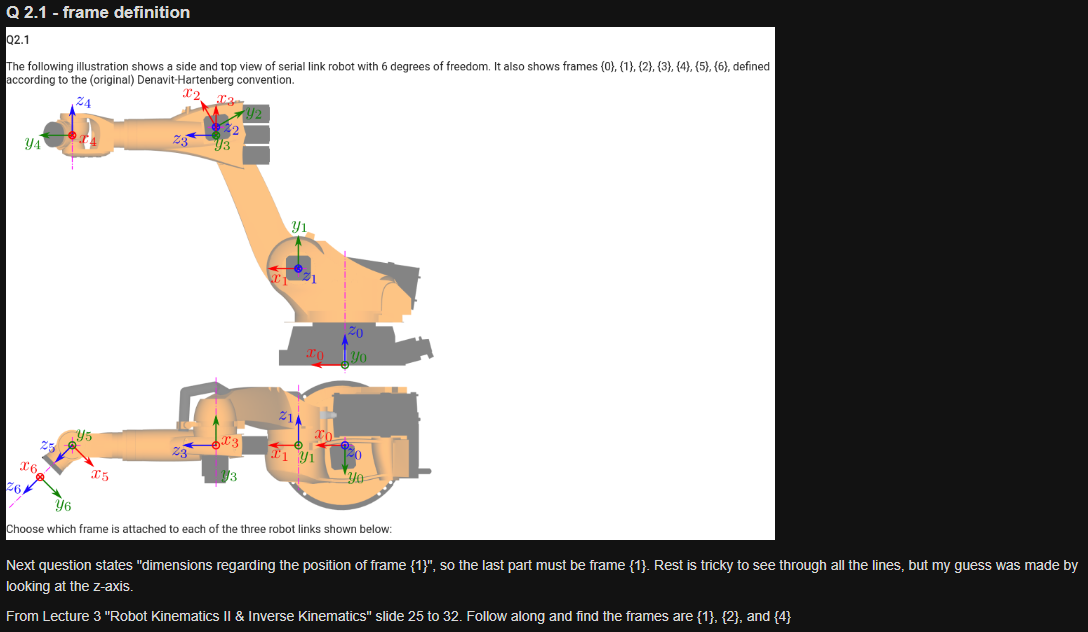

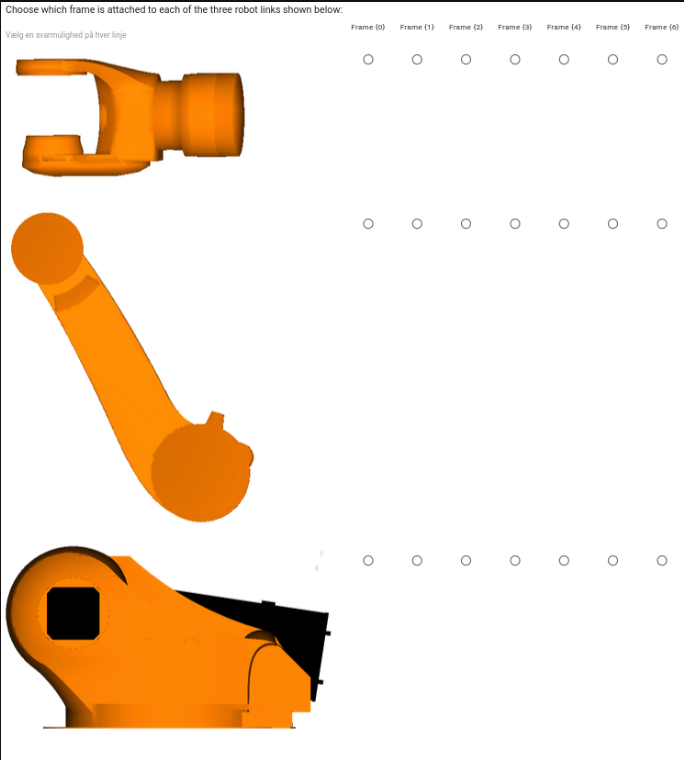

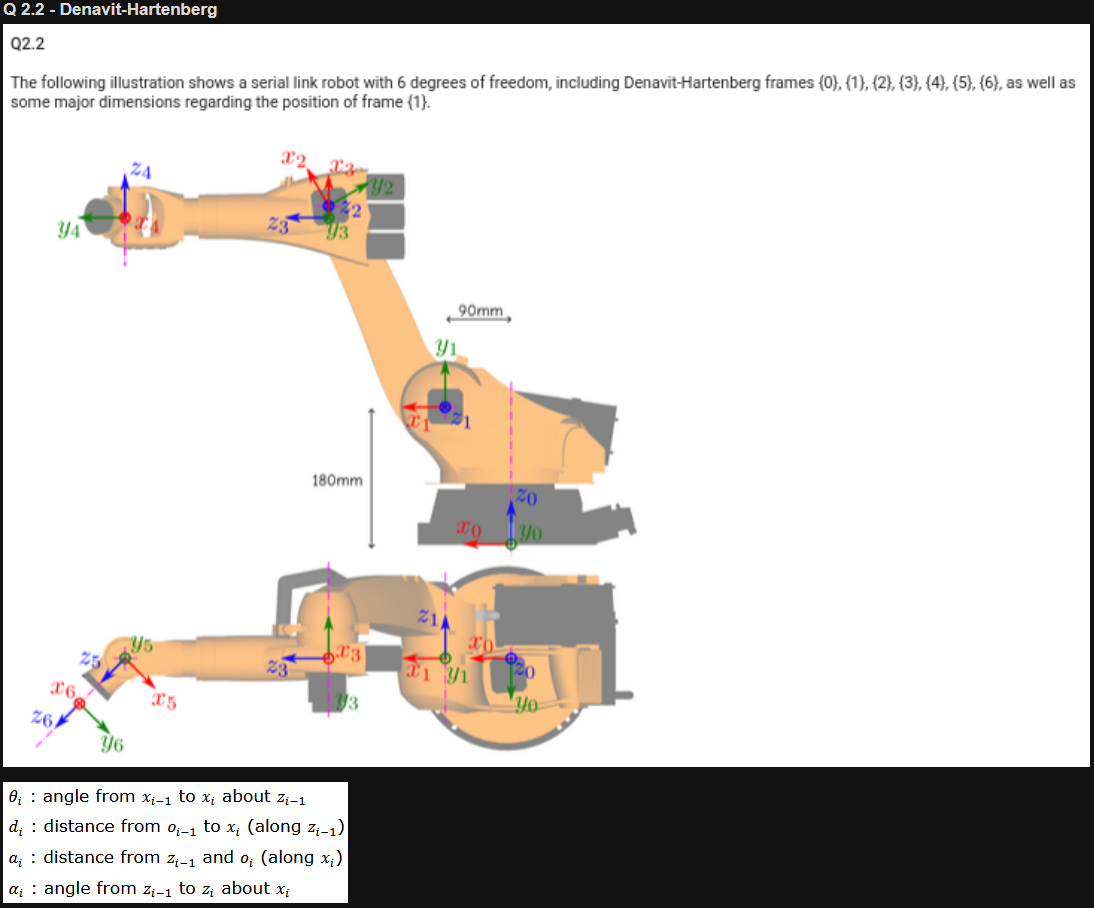
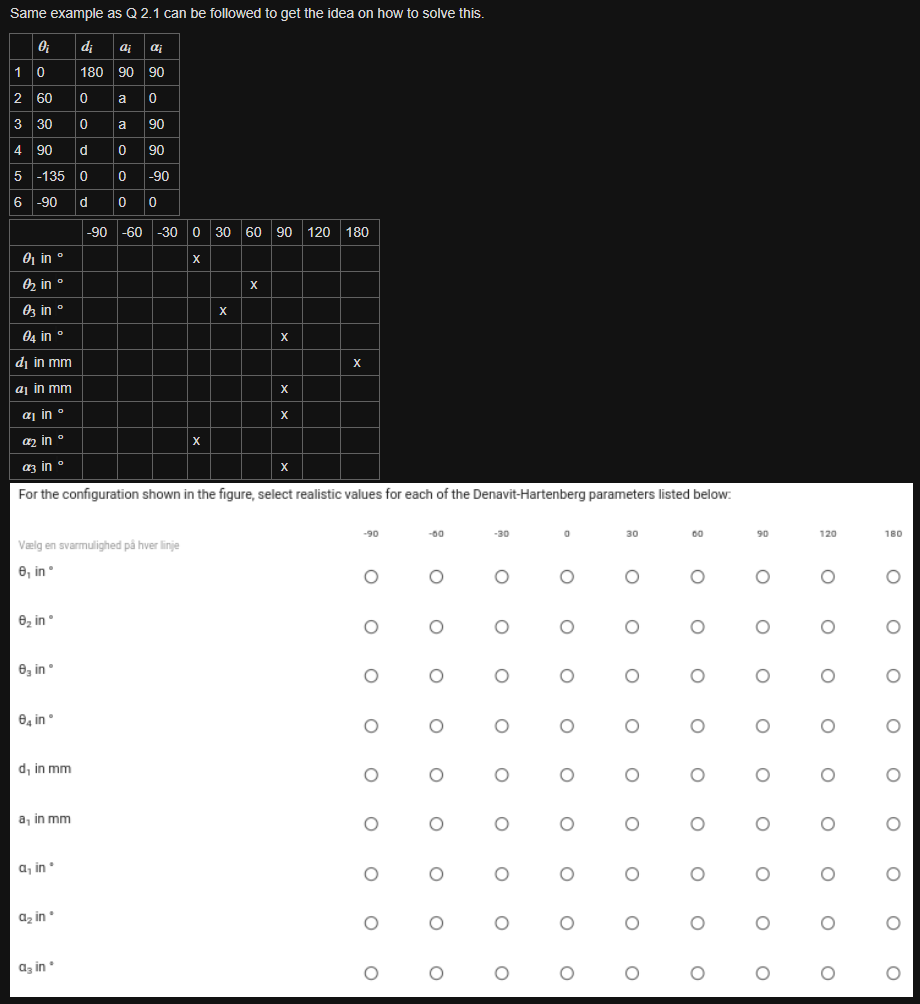

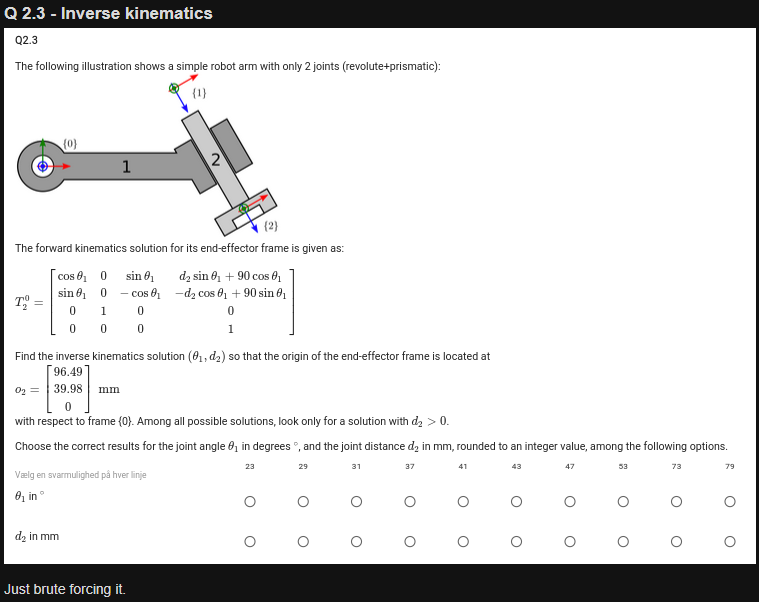

In [18]:
import numpy as np

# Transformation function T02(theta, d)
def T02(theta, d):
    theta_rad = np.deg2rad(theta)
    return np.array([
        [np.cos(theta_rad), 0,  np.sin(theta_rad),  d*np.sin(theta_rad) + 90*np.cos(theta_rad)],
        [np.sin(theta_rad), 0, -np.cos(theta_rad), -d*np.cos(theta_rad) + 90*np.sin(theta_rad)],
        [0,                 1,  0,                  0],
        [0,                 0,  0,                  1]
    ])

# Target position vector o2
o2 = np.array([96.49, 39.98, 0])

# Options for theta and d
options = [23, 29, 31, 37, 41, 43, 47, 53, 73, 79]

# Tolerance
tolerance = 1e-2

# Brute-force search for theta and d pairs
for theta in options:
    for d in options:
        T = T02(theta, d)
        position = T[0:3, 3]
        if np.all(np.abs(position - o2) < tolerance):
            print(f"Match found: theta = {theta}, d = {d}")
            print(f"Computed position: [{position[0]:.3f}; {position[1]:.3f}; {position[2]:.3f}]")


Match found: theta = 53, d = 53
Computed position: [96.491; 39.981; 0.000]


Analytical approach:

In [19]:
from sympy import symbols, Matrix, cos, sin, rad, Eq, solve, N

# Define symbolic variables
theta, d = symbols('theta d')

# Define the symbolic transformation matrix T02_sym
T02_sym = Matrix([
    [cos(rad(theta)), 0,  sin(rad(theta)),  d*sin(rad(theta)) + 90*cos(rad(theta))],
    [sin(rad(theta)), 0, -cos(rad(theta)), -d*cos(rad(theta)) + 90*sin(rad(theta))],
    [0,               1,  0,                0],
    [0,               0,  0,                1]
])

# Given target position
o2 = Matrix([96.49, 39.98, 0])

# Define the equations
eqns = [
    Eq(T02_sym[0, 3], o2[0]),
    Eq(T02_sym[1, 3], o2[1])
]

# Solve the equations
solution = solve(eqns, [theta, d], dict=True)

# Display solutions numerically
for sol in solution:
    print(f"Theta = {N(sol[theta], 4)} degrees")
    print(f"d     = {N(sol[d], 4)} mm\n")


Theta = -7.986 degrees
d     = -53.00 mm

Theta = 53.00 degrees
d     = 53.00 mm



Last pair fits the solution

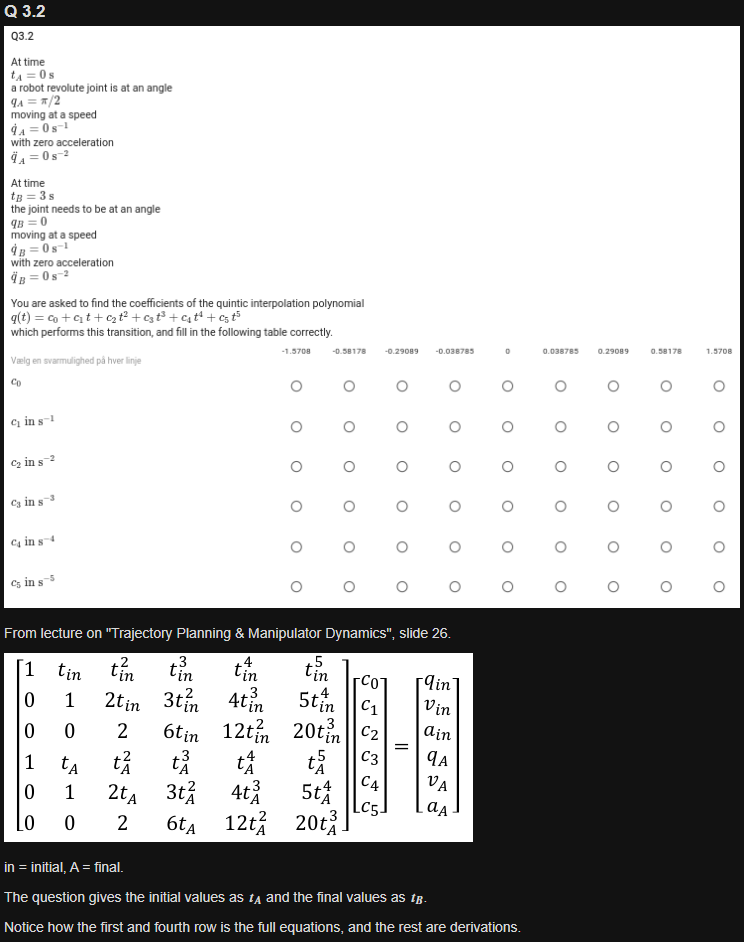

In [20]:
from sympy import symbols, Matrix, solve, pi

# Define symbolic coefficients
c0, c1, c2, c3, c4, c5 = symbols('c0 c1 c2 c3 c4 c5')
c = Matrix([c0, c1, c2, c3, c4, c5])

# Time bounds
tA = 0
tB = 3

# Boundary conditions
j = Matrix([pi/2, 0, 0, 0, 0, 0])  # Initial and final pos, vel, acc

# Quintic polynomial constraint matrix
quin = Matrix([
    [1, tA, tA**2, tA**3,     tA**4,      tA**5],
    [0, 1, 2*tA,  3*tA**2,   4*tA**3,    5*tA**4],
    [0, 0, 2,     6*tA,     12*tA**2,   20*tA**3],
    [1, tB, tB**2, tB**3,     tB**4,      tB**5],
    [0, 1, 2*tB,  3*tB**2,   4*tB**3,    5*tB**4],
    [0, 0, 2,     6*tB,     12*tB**2,   20*tB**3]
])

# Solve the linear system quin * c = j
solution = solve(quin * c - j, (c0, c1, c2, c3, c4, c5))

# Print evaluated solution
for name, value in solution.items():
    print(f"{name} = {value.evalf(6)}")


c0 = 1.57080
c1 = 0
c2 = 0
c3 = -0.581776
c4 = 0.290888
c5 = -0.0387851


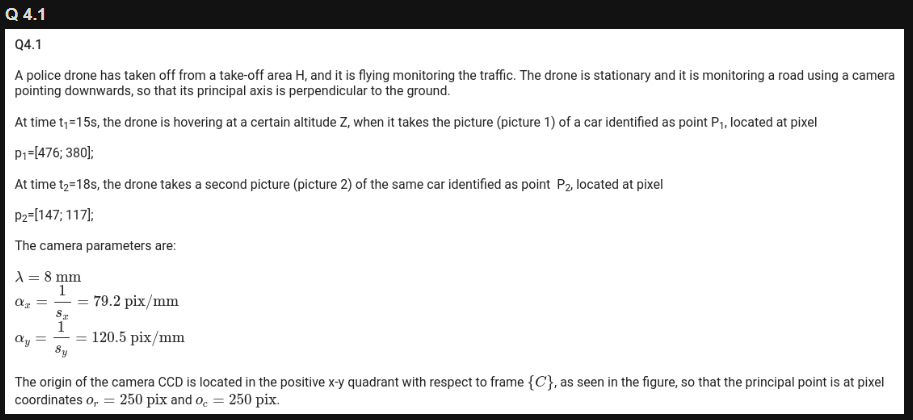

In [24]:
p1 = np.array([476,380])
p2 = np.array([147,117])
focal = 8
alpha_x = 79.2
alpha_y = 120.5
o_r = 250
o_c = 250

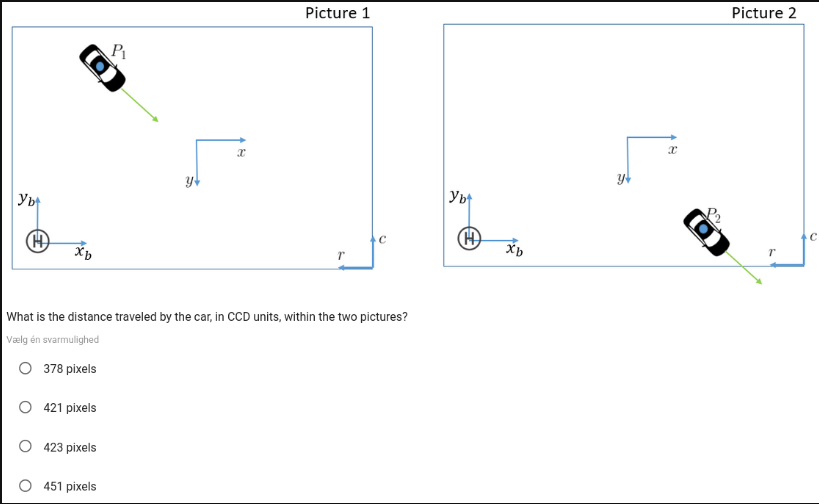

In [34]:
travel_vec = p1 - p2
dist_pixel = np.linalg.norm(travel_vec)
print(dist_pixel)

421.2006647668068


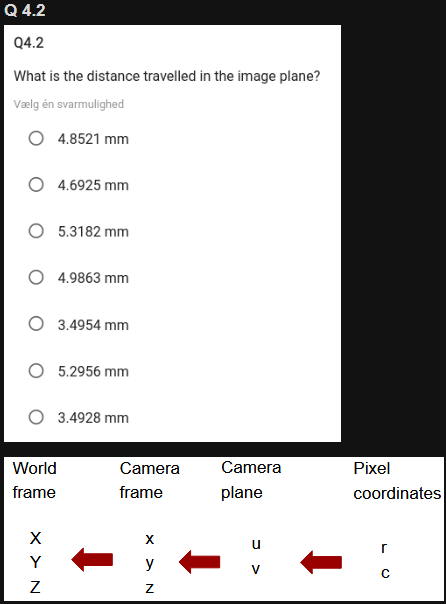

In [35]:
# Given travel_vec (pixels) and alpha_x, alpha_y (pixels per mm)
alpha_x = 79.2  # pixels per mm
alpha_y = 120.5

# Element-wise division to get mm
img_plane = np.divide(travel_vec, np.array([alpha_x, alpha_y]))
print(img_plane)
# Euclidean norm (distance) in mm
dist_img_plane = np.linalg.norm(img_plane)

print("img_plane (mm):", img_plane)
print("Distance in image plane (mm):", dist_img_plane)

[4.1540404  2.18257261]
img_plane (mm): [4.1540404  2.18257261]
Distance in image plane (mm): 4.692512641885356


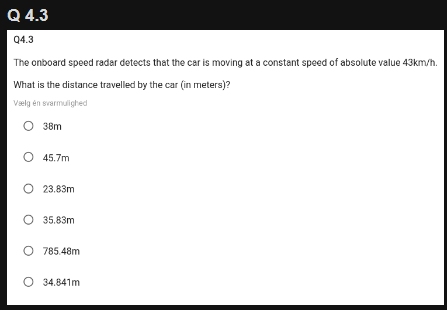

In [36]:
t1 = 15/3600; # Converting 15 sec to hours
t2 = 18/3600; # Converting 18 sec to hours
delta_t = t2 - t1;
(43*1000) * delta_t # velocity * time = distance

35.83333333333334